# This is an old and unused file. Please open laptop_regression.ipynb


Importok

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


Beolvasás

In [129]:
df = pd.read_csv('laptop.csv', sep=',')
df.head()

# ID-t tilos modellnek átadni
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.head()

# Battery life -> Numerikus adat
def extract_battery_life(text):
    if isinstance(text, str):
        match = re.search(r'\d+(\.\d+)?', text)
        return float(match.group()) if match else None
    return text

df['Battery_Life'] = df['Battery_Life'].apply(extract_battery_life)
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,12.0
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,11.0
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,10.0
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,7.3
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,8.0


In [130]:
df.isnull().sum().any

<bound method Series.any of Brand                0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64>

Hiányzó értékek kezelése

Kb. 4000 laptop, kb. 400 hiányzó adat -> 10% -> Átlaggal feltölteni

In [131]:
#average_battery_life = df['Battery_Life'].mean()
# Probléma: Helyenként nem órát, hanem W adaptert mond
#df['Battery_Life'].fillna(average_battery_life, inplace=True)
df.drop(['Battery_Life'], axis=1, inplace=True)
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45


In [132]:
df.isnull().sum().any

<bound method Series.any of Brand              0
Price              0
Processor_Name     0
Processor_Brand    0
RAM_Expandable     0
RAM                0
RAM_TYPE           0
Ghz                0
Display_type       0
Display            0
GPU                8
GPU_Brand          4
SSD                0
HDD                0
Adapter            0
dtype: int64>

In [133]:
df.dropna(subset=['GPU'], inplace=True)
df.dropna(subset=['GPU_Brand'], inplace=True)

df.isnull().sum().any

<bound method Series.any of Brand              0
Price              0
Processor_Name     0
Processor_Brand    0
RAM_Expandable     0
RAM                0
RAM_TYPE           0
Ghz                0
Display_type       0
Display            0
GPU                0
GPU_Brand          0
SSD                0
HDD                0
Adapter            0
dtype: int64>

In [134]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45


In [135]:
def extract_hdd(text):
    if text == 'No HDD':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None

def extract_ssd(text):
    if text == 'NO SSD':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    
def extract_expendable(text):
    if text == 'Not Expandable':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    
def extract_ram(text):
    if isinstance(text, str):
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    return text

def extract_frequency(text):
    if isinstance(text, str):
        match = re.search(r'(\d+(\.\d+)?)', text)
        return float(match.group(1)) if match else None
    return text



df['HDD'] = df['HDD'].apply(extract_hdd)
df['SSD'] = df['SSD'].apply(extract_ssd)
df['RAM'] = df['RAM'].apply(extract_ram)
df['RAM_Expandable'] = df['RAM_Expandable'].apply(extract_expendable)
df['Ghz'] = df['Ghz'].apply(extract_frequency)

df['Adapter'] = pd.to_numeric(df['Adapter'], errors='coerce')
average_adapter = df['Adapter'].mean()
df['Adapter'].fillna(average_adapter, inplace=True)
df['Adapter'] = df['Adapter'].astype(int)

C:\Users\neuge\AppData\Local\Temp\ipykernel_24280\1383520108.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Adapter'].fillna(average_adapter, inplace=True)


In [136]:
drop = df[df['Display'].str.contains("OLED Display With Touchscreen", na=False)].index
df.drop(drop, inplace=True)

In [137]:
df.head(100)

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,HP,22990,MediaTek Octa-core,MediaTek,0,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64,0,45
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512,0,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512,0,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512,0,80
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,0,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASUS,50990,Intel Core i5 (10th Gen),Intel,16,8,DDR4 RAM,2.4,LCD,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512,0,150
96,Apple,92990,Apple M2 Processor,Apple,0,8,RAM,0.0,LCD,13.6,M2 Integrated,Apple,256,0,65
97,HP,36499,AMD Hexa-Core Ryzen 5,AMD,16,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512,0,65
98,Acer,49490,AMD Hexa-Core Ryzen 5,AMD,32,8,DDR4 RAM,2.1,LCD,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512,0,135


In [142]:
# Encoding

label_encoder = LabelEncoder()

columns = ['Brand', 'Processor_Name', 'Processor_Brand', 'RAM_TYPE', 'Display_type', 'GPU', 'GPU_Brand']
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,9,22990,122,16,0,4,2,2.0,1,11.6,179,5,64,0,45
1,15,36289,23,13,12,8,2,4.0,0,15.6,216,0,512,0,65
2,6,78500,82,15,32,16,3,3.3,0,15.6,84,8,512,0,56
3,9,55490,82,15,8,8,2,4.2,0,15.6,191,4,512,0,80
4,12,21990,66,15,0,8,6,1.7,0,15.6,282,4,512,0,45


In [119]:
# Scaling

scaler = MinMaxScaler()
columns_to_scale = ['RAM_Expandable', 'RAM', 'SSD', 'HDD', 'Ghz']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,9,22990,122,16,0.0000,0.032258,2,0.363636,1,11.6,179,5,0.015617,0.0,45
1,15,36289,23,13,0.1875,0.096774,2,0.727273,0,15.6,216,0,0.124939,0.0,65
2,6,78500,82,15,0.5000,0.225806,3,0.600000,0,15.6,84,8,0.124939,0.0,56
3,9,55490,82,15,0.1250,0.096774,2,0.763636,0,15.6,191,4,0.124939,0.0,80
4,12,21990,66,15,0.0000,0.096774,6,0.309091,0,15.6,282,4,0.124939,0.0,45


In [139]:
# Splitting



X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Regressor

In [123]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss:.2f}")
print(f"Validation Loss (MSE): {val_loss:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Validation R²: {val_r2:.2f}")

Training Loss (MSE): 84312553.67
Validation Loss (MSE): 657038777.93
Training R²: 0.97
Validation R²: 0.77


Linear Regression

In [124]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss:.2f}")
print(f"Validation Loss (MSE): {val_loss:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Validation R²: {val_r2:.2f}")

Training Loss (MSE): 823988556.86
Validation Loss (MSE): 826677650.27
Training R²: 0.69
Validation R²: 0.72


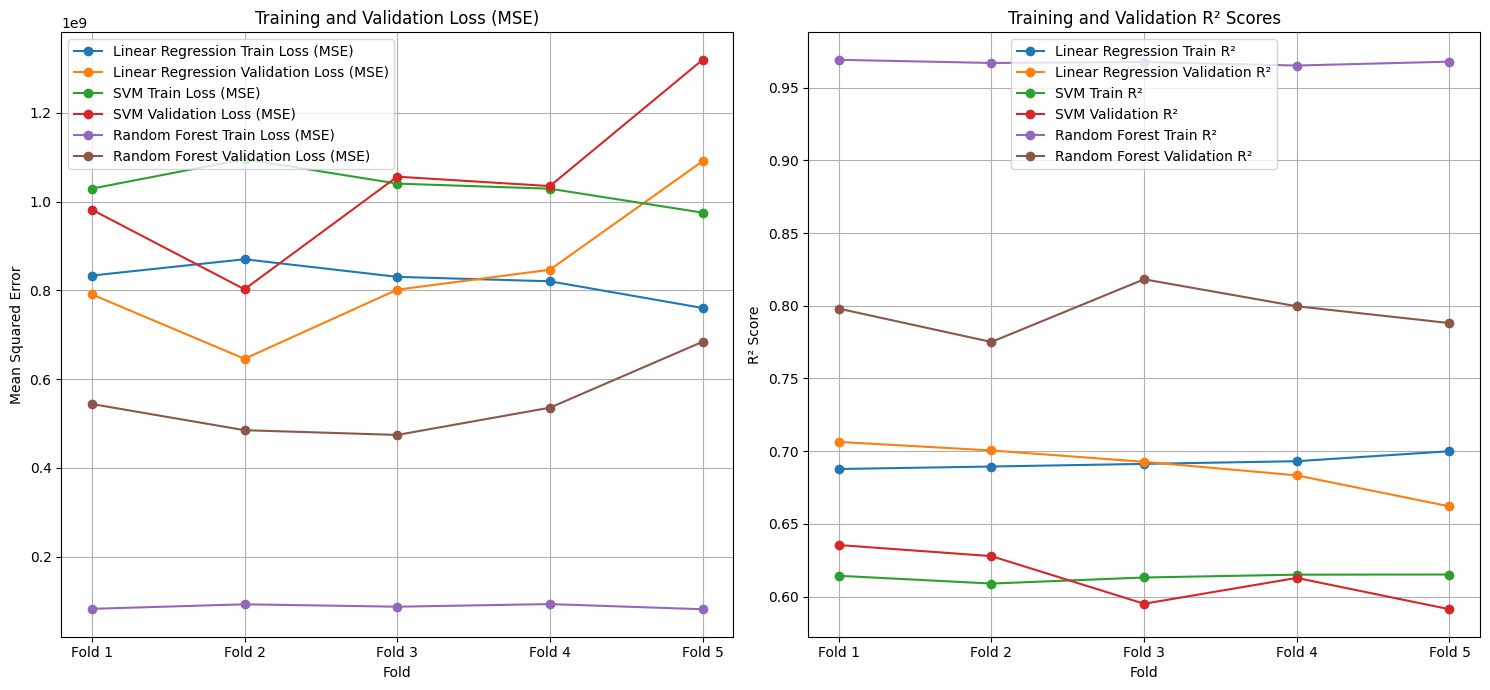


Linear Regression Results:
Average Training Loss (MSE): 822774216.74
Average Validation Loss (MSE): 834999341.39
Average Training R² Score: 0.69
Average Validation R² Score: 0.69

SVM Results:
Average Training Loss (MSE): 1033709184.63
Average Validation Loss (MSE): 1038786015.58
Average Training R² Score: 0.61
Average Validation R² Score: 0.61

Random Forest Results:
Average Training Loss (MSE): 87361664.38
Average Validation Loss (MSE): 544485924.91
Average Training R² Score: 0.97
Average Validation R² Score: 0.80


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

losses = {
    "Linear Regression": {"train": [], "val": []},
    "SVM": {"train": [], "val": []},
    "Random Forest": {"train": [], "val": []}
}

r2_scores = {
    "Linear Regression": {"train": [], "val": []},
    "SVM": {"train": [], "val": []},
    "Random Forest": {"train": [], "val": []}
}

# Define a function to evaluate a model using KFold
def evaluate_model(model, model_name):
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_train_pred = model.predict(X_fold_train)
        y_val_pred = model.predict(X_fold_val)

        train_loss = mean_squared_error(y_fold_train, y_train_pred)
        val_loss = mean_squared_error(y_fold_val, y_val_pred)
        
        r2_train = r2_score(y_fold_train, y_train_pred)
        r2_val = r2_score(y_fold_val, y_val_pred)

        losses[model_name]["train"].append(train_loss)
        losses[model_name]["val"].append(val_loss)
        r2_scores[model_name]["train"].append(r2_train)
        r2_scores[model_name]["val"].append(r2_val)


linear_model = LinearRegression()
evaluate_model(linear_model, "Linear Regression")


svm_model = SVR(kernel='linear')
evaluate_model(svm_model, "SVM")


rf_model = RandomForestRegressor()
evaluate_model(rf_model, "Random Forest")


plt.figure(figsize=(15, 7))


for model_name in losses.keys():
    plt.subplot(1, 2, 1)
    plt.plot(losses[model_name]["train"], label=f'{model_name} Train Loss (MSE)', marker='o')
    plt.plot(losses[model_name]["val"], label=f'{model_name} Validation Loss (MSE)', marker='o')

plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(ticks=range(len(losses["Linear Regression"]["train"])), 
           labels=[f'Fold {i+1}' for i in range(len(losses["Linear Regression"]["train"]))])
plt.legend()
plt.grid()



plt.subplot(1, 2, 2)
for model_name in r2_scores.keys():
    plt.plot(r2_scores[model_name]["train"], label=f'{model_name} Train R²', marker='o')
    plt.plot(r2_scores[model_name]["val"], label=f'{model_name} Validation R²', marker='o')

plt.title('Training and Validation R² Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.xticks(ticks=range(len(r2_scores["Linear Regression"]["train"])), 
           labels=[f'Fold {i+1}' for i in range(len(r2_scores["Linear Regression"]["train"]))])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

for model_name in losses.keys():
    avg_train_loss = np.mean(losses[model_name]["train"])
    avg_val_loss = np.mean(losses[model_name]["val"])
    avg_r2_train = np.mean(r2_scores[model_name]["train"])
    avg_r2_val = np.mean(r2_scores[model_name]["val"])
    
    print(f"\n{model_name} Results:")
    print(f"Average Training Loss (MSE): {avg_train_loss:.2f}")
    print(f"Average Validation Loss (MSE): {avg_val_loss:.2f}")
    print(f"Average Training R² Score: {avg_r2_train:.2f}")
    print(f"Average Validation R² Score: {avg_r2_val:.2f}")